In [20]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

from hyperopt import hp, tpe, Trials, fmin
import numpy as np

In [3]:
data = pd.read_csv('Mobile Classification.csv')


In [4]:
data[['blue', 'dual_sim', 'four_g', 'three_g','touch_screen', 'wifi']] = data[['blue', 'dual_sim', 'four_g','three_g', 'touch_screen', 'wifi']].astype('bool')

In [5]:
x = data.iloc[:,:20]
y = data.iloc[:,-1:]

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
battery_power    2000 non-null int64
blue             2000 non-null bool
clock_speed      2000 non-null float64
dual_sim         2000 non-null bool
fc               2000 non-null int64
four_g           2000 non-null bool
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null bool
touch_screen     2000 non-null bool
wifi             2000 non-null bool
dtypes: bool(6), float64(2), int64(12)
memory usage: 230.5 KB


In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
price_range    2000 non-null int64
dtypes: int64(1)
memory usage: 15.7 KB


In [8]:
num = list(x.select_dtypes(include=[np.number]))
cat = list(x.select_dtypes(include=['bool']))
num
cat

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [9]:
scaler = StandardScaler()
x[['battery_power', 'clock_speed',  'fc',  'int_memory',  'm_dep',  'mobile_wt', 
   'n_cores',  'pc',  'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]= scaler.fit_transform(x[['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']])


In [10]:
for i in cat:
    x[i] = LabelEncoder().fit_transform(x[i])

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null float64
four_g           2000 non-null int64
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null float64
pc               2000 non-null float64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null float64
sc_w             2000 non-null float64
talk_time        2000 non-null float64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
dtypes: float64(14), int64(6)
memory usage: 312.6 KB


In [12]:
y['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [44]:
#D_train = xgb.DMatrix(x_train, label=y_train)
#D_test = xgb.DMatrix(x_test, label=y_test)

In [57]:
param = {
    'n_estimators':[200, 400, 600, 800, 1000],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], 
    'max_depth': [10,50, 100],   
     'subsample': [0.5, 0.6, 0.7, 0.8],
    'gamma': [0,3,6]}

bc1 = XGBClassifier(objective = 'multi:softmax',num_class= 4, random_state = 101)
rs = RandomizedSearchCV(estimator = bc1, param_distributions = param, n_iter=50,
                                   scoring='f1_macro',
                                   cv=3, 
                                   verbose=1, random_state=8)

rs.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  9.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None, num_class=4,
                                           objective='multi:softmax',
                                           random_state=101...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distr

In [58]:
rs.best_params_
bcc = rs.best_estimator_

In [59]:
bcc.fit(x_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, num_class=4, objective='multi:softprob',
              random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.6, verbosity=1)

[[ 96   4   0   0]
 [  5  84  10   0]
 [  0   7  81   8]
 [  0   0   4 101]]
0.905
0.09499999999999997
[0.95049505 0.88421053 0.85263158 0.9266055 ]
[0.96       0.84848485 0.84375    0.96190476]
[0.95522388 0.86597938 0.84816754 0.94392523]
0.9033240087380473


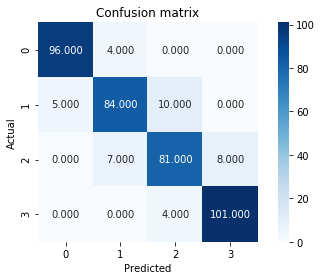

In [60]:
y_pred = bcc.predict(x_test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

In [17]:
y_train.head()

,price_range
1260,0
916,0
532,3
1159,0
1584,0


In [ ]:
def objective_func(args):
    n_estimators = args['n_estimators']
    max_depth = args['max_depth']
    num_round = args['num_round']
    gamma = args['gamma']
    learning_rate = args['learning_rate']
    subsample = args['subsample']
 
    clf = XGBClassifier(n_estimators = n_estimators, gamma=gamma, subsample=subsample, max_depth= max_depth, num_round = num_round,learning_rate = learning_rate)
    
    
    clf.fit(x_train,y_train)    
    y_pred = clf.predict(x_test)
    f1 = -(f1_score(y_pred,y_test,  average='macro'))
    return f1
space = {'n_estimators':  hp.choice('n_estimators',[200,400,600,800,1000]), 
        'gamma': hp.choice('gamma',range(0,10)),
         'subsample' : hp.choice('subsample',[0.5, 0.6, 0.7, 0.8]),
        'max_depth': hp.choice('max_depth',range(10,100)),
        'learning_rate': hp.choice('learning_rate',[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
        'num_round':hp.choice('num_round', range(10,100))}
                                
                                
                                
best_classifier = fmin(objective_func, space, algo=tpe.suggest, max_evals=100)
print(best_classifier)

 36%|███▌      | 36/100 [04:19<07:47,  7.30s/it, best loss: -0.9064538119589484]

In [43]:

bccbo = GradientBoostingClassifier(learning_rate= 0.5, max_features = 'auto', max_leaf_nodes = 21, min_samples_leaf= 77, min_samples_split =29, n_estimators = 500)
bccbo.fit(x_train, y_train)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=21,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=77, min_samples_split=29,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

[[94  6  0  0]
 [ 5 89  5  0]
 [ 0  5 88  3]
 [ 0  0  6 99]]
0.925
0.07499999999999996
[0.94949495 0.89       0.88888889 0.97058824]
[0.94       0.8989899  0.91666667 0.94285714]
[0.94472362 0.89447236 0.9025641  0.95652174]
0.9245704553985088


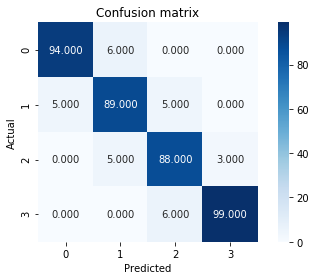

In [44]:
y_pred = bccbo.predict(x_test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average